In [4]:
#Import the packages
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC , NuSVC
from sklearn.metrics import roc_curve, auc
from sklearn import metrics  
import numpy as np 
import matplotlib as plt
from matplotlib import pyplot as plt
import os 
import pandas as pd
import scipy.io as sio
from sklearn.model_selection import cross_val_score
import pylab as pl
import pandas as pd

In [5]:
def load_dataset():
    load = sio.loadmat('features(10)_cwt')
    features = np.array(load['features'])
    print(features.shape)
    load = sio.loadmat('SC4001E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = b[800:1633,1]
    load = sio.loadmat('SC4011E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4012E0-PSG_hyp.mat') 
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4021E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4022E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4031E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4032E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4041E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4042E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    load = sio.loadmat('SC4051E0-PSG_hyp.mat')
    b= np.array(load['hypnogram'])
    labels = np.append(labels, b[800:1633,1])
    print(max(labels))
    labels = np.where(labels==4,3,labels)
    labels = np.where(labels==6,0,labels)
    #labels = np.where(labels==5,4,labels)
    #print(len(np.where(labels==1)[0]))
    #print(max(labels))
    feat = features[800:1633,:]
    #print(feat.shape)
    for i in range (1,10):
        feat =  np.append(features[800+i*1633:1633+i*1633,:],feat,axis=0) 
    print(feat.shape)
    return feat, labels

In [49]:
def svm_single_cv(x_train ,x_test, y_train, y_test):
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    #svclassifier = NuSVC(nu=0.5,kernel='rbf',class_weight={0:2,1:4,2:1,3:1,5:2})  
    acc = []
    for i in range (1,20):
        svcclassifier = SVC(kernel='rbf',cache_size=1000,gamma=i)
        scores = cross_val_score(svcclassifier, x_train, y_train, cv=5)
        acc.append(np.mean(scores))
        print("iteration number: ", i)
    plt.figure(figsize=(12, 6))  
    plt.plot(range(1, 20), acc, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
    plt.title('Accuracy vs gamma Value')  
    plt.xlabel('gamma Value')  
    plt.ylabel('Mean Accuracy after 5 fold Cross Validation')
    gamma = np.argmax(acc)+1
    acc = []
    for i in range (1,20):
        svcclassifier = SVC(kernel='rbf',cache_size=1000,gamma=gamma,C=i/10)
        scores = cross_val_score(svcclassifier, x_train, y_train, cv=5)
        acc.append(np.mean(scores))
        print("iteration number: ", i)
    plt.figure(figsize=(12, 6))  
    plt.plot(range(1, 20), acc, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
    plt.title('Accuracy vs gamma Value')  
    plt.xlabel('gamma Value')  
    plt.ylabel('Mean Accuracy after 5 fold Cross Validation')
    C = (np.argmax(acc)+1)/10
    svclassifier = SVC(kernel='rbf',gamma=gamma,C=C)
    #svclassifier = SVC(kernel='rbf',class_weight='balanced')
    #svclassifier = SVC(kernel='poly',degree=8)
    svclassifier.fit(x_train, y_train)
    y_pred = svclassifier.predict(x_test)
    return svclassifier , y_pred

def do_svm_multiple(x_train,x_test,y_train,y_test):
    y_pred = np.zeros((len(x_test),1))
    for i in range (10):
        idx = np.random.randint(0,len(x_test),int(len(x_test)/1))
        x_train_sub = scaler.fit_transform(x_train[idx])
        y_train_sub = y_train[idx]
        #svclassifier = SVC(kernel='poly',class_weight={0:0.7,1:0.2,2:0.1,3:0.05,5:0.05})
        svclassifier = SVC(kernel='rbf',gamma=5)
        #svclassifier = SVC(kernel='rbf')
        svclassifier.fit(x_train_sub, y_train_sub)
        x_test = scaler.fit_transform(x_test)
        y_pred = np.append(y_pred, np.reshape(svclassifier.predict(x_test), (len(x_test),1)), axis=1)
        print("round ", i)
    y_pred_final = np.amax(y_pred,axis=1)
    y_pred_final.astype(int)
    #print(y_pred_final, y_test)
    return y_pred_final    
    

(16330, 7)
6
(8330, 7)
iteration number:  1
iteration number:  2
iteration number:  3
iteration number:  4
iteration number:  5
iteration number:  6
iteration number:  7
iteration number:  8
iteration number:  9
iteration number:  10
iteration number:  11
iteration number:  12
iteration number:  13
iteration number:  14
iteration number:  15
iteration number:  16
iteration number:  17
iteration number:  18
iteration number:  19
iteration number:  1
iteration number:  2
iteration number:  3
iteration number:  4
iteration number:  5
iteration number:  6
iteration number:  7
iteration number:  8
iteration number:  9
iteration number:  10
iteration number:  11
iteration number:  12
iteration number:  13
iteration number:  14
iteration number:  15
iteration number:  16
iteration number:  17
iteration number:  18
iteration number:  19
Accuracy: 0.5234093637454982
[[ 74   0  64   7   3]
 [  3   1  71   1   0]
 [ 25   0 339   4   6]
 [ 12   0  85   9   3]
 [  8   0 104   1  13]]
              

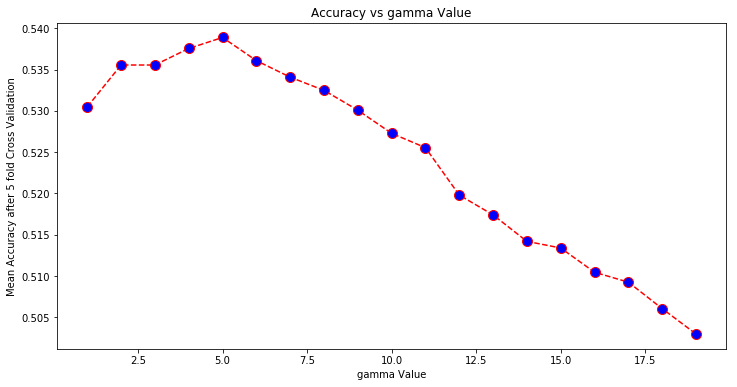

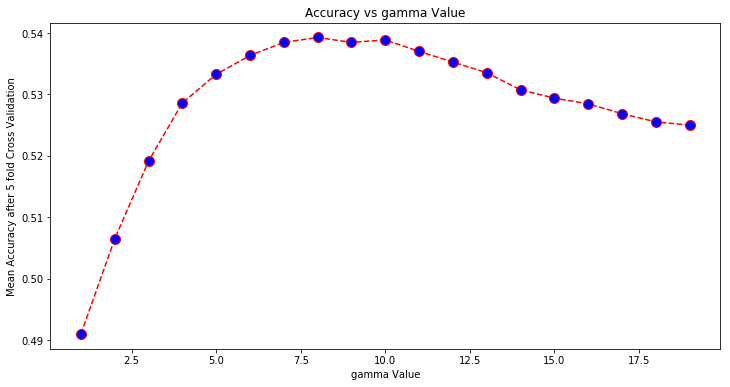

In [51]:
feat, labels = load_dataset()
scaler = StandardScaler()
x_train ,x_test, y_train, y_test = train_test_split(feat,labels,test_size=0.1,random_state=0)
svclassifier, y_pred = svm_single_cv(x_train ,x_test, y_train, y_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))  
print(metrics.classification_report(y_test, y_pred))

(16330, 7)
6
(8330, 7)
0.525821704583673
(array([21], dtype=int64),)
Accuracy: 0.4717887154861945


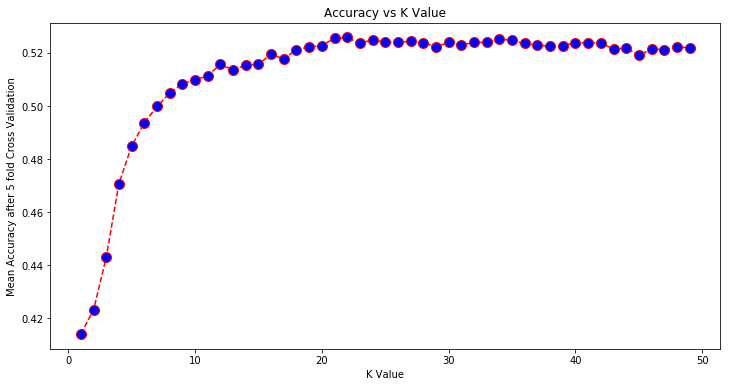

In [46]:
feat, labels = load_dataset()
x_train ,x_test, y_train, y_test = train_test_split(feat,labels,test_size=0.1,random_state=1)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 50):  
    knn = KNeighborsClassifier(n_neighbors=i)
    #knn.fit(x_train, y_train)
    #pred_i = knn.predict(x_test)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    error.append(np.mean(scores))
    #print("err=", np.mean(pred_i != y_test))
    #print("Accuracy:",metrics.accuracy_score(pred_i, y_pred))
    #print(metrics.confusion_matrix(y_test, pred_i))  
    #print(metrics.classification_report(y_test, pred_i))
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy vs K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Accuracy after 5 fold Cross Validation')
print(max(error))
print(np.where(error==max(error)))
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train,y_train)
pred_i = knn.predict(x_test)
print("Accuracy:",metrics.accuracy_score(pred_i, y_pred))